In [1]:
from sklearn.cluster import KMeans, AffinityPropagation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.cluster.hierarchy as hcluster

import random

In [2]:
# Lukas Directory
#batch1 = pd.read_parquet(r"C:\Users\schei\OneDrive\Desktop\icecube project\batch_1.parquet\batch_1.parquet")
#sensor_geom = pd.read_csv(r"C:\Users\schei\OneDrive\Dokumente\GitHub\ice-cube\sensor_geometry.csv")

#Ben Directory
batch1 = pd.read_parquet('/opt/app/data/erdos-data/train/batch_1.parquet')
sensor_geom = pd.read_csv('/opt/app/data/erdos-data/sensor_geometry.csv')

In [4]:
len(batch1[batch1.auxiliary==False].index)

23551893

In [15]:
def id_to_xyz(sen_id):
    return sensor_geom.loc[sen_id][['x','y','z']].values

In [ ]:
def normalize_charge(event):
    event_test=event.copy()
    column='charge'
    event_test['charge'] = (event['charge'] - event[column].min()) / (event[column].max() - event[column].min())
    return event_test

In [ ]:
def normalize_time(event):
    event_test=event.copy()
    event_test['time']=event['time']-(event['time'].min())
    return event_test

In [8]:
len(event_list)

23551893

In [7]:
batch1_small=batch1[batch1.auxiliary==False]
event_list=list(batch1_small.index)
len(event_list)

23551893

In [6]:
norm_batch=[]
i=0
for event_id in event_list:
    i+=1
    event=batch1.loc[event_id]
    norm_event=event.copy()
    norm_event=normalize_charge(norm_event)
    norm_event=normalize_time(norm_event)
    norm_batch.append(event)

NameError: name 'event_list' is not defined

In [9]:
batch1.keys()

Index(['sensor_id', 'time', 'charge', 'auxiliary'], dtype='object')

In [10]:
for i in range(0, len(event)):
    test.loc[i,['x','y','z']] = id_to_xyz(test.loc[i,'sensor_id'])

NameError: name 'event' is not defined

In [11]:
def mydist(a,b):
    diff=a-b
    return np.dot(diff*diff, (np.array([1,1,1,1])) )


In [12]:
def hcluster_euc_distance(event, threshhold=150):
    trunc_event=event[['sensor_id', 'charge']]
    raw_data = [np.append(id_to_xyz(trunc_event.iloc[i][0]), trunc_event.iloc[i][1]) for i in range(len(trunc_event))]
    clusters = hcluster.fclusterdata(raw_data, threshhold, criterion='distance')
    return clusters, raw_data

In [13]:
def aff_cluster(event, seed, pref):
    trunc_event=event[['sensor_id', 'time', 'charge']]
    raw_data = [np.append(id_to_xyz(trunc_event.iloc[i][0]), [event.iloc[i][2]]) for i in range(len(trunc_event))]
    #raw_data= [event.iloc[i][1] for i in range(len(trunc_event))].reshape(-1,1)
    clusters= AffinityPropagation(random_state=seed, preference=pref, max_iter=100000).fit(raw_data)
    return clusters, raw_data

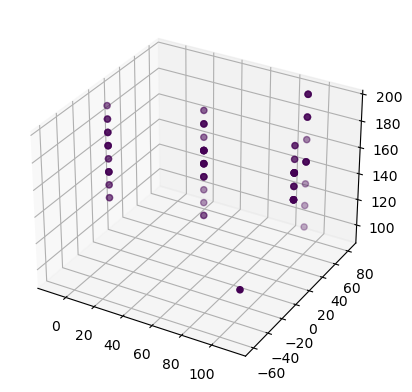

Number of clusters: 1 
 Event_id: 2638738


In [18]:
event_id=random.choice(event_list)
event_id=79
event_id=2638738
event=batch1[batch1.auxiliary==False].loc[event_id]
clusters, raw_data=hcluster_euc_distance(event,150)
    
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [a[0] for a in raw_data]
ys = [a[1] for a in raw_data]
zs = [a[2] for a in raw_data]

ax.scatter(xs, ys, zs,
           c=clusters)

plt.show()

print("Number of clusters:", len(set(clusters)),'\n Event_id:', event_id )